In [92]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import scipy.stats as st
import random

In [3]:
# Read the csv data file as data_df
data_df = pd.read_csv("data/Billionaires Statistics Dataset.csv")
data_df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [4]:
# Convert gdp_country to float
data_df['gdp_country']= data_df['gdp_country'].replace('[\$,]', '', regex=True).astype(float)
# Convert unit of measurement
data_df['finalWorth'] = data_df['finalWorth']/1000
data_df['gdp_country'] = round(data_df['gdp_country']/1000000000,1)
data_df['population_country'] = round(data_df['population_country']/1000000,1)
data_df['age'] = round(data_df['age'],0)
data_df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211.0,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,2715.5,65.6,102.5,82.5,24.2,60.7,67.1,46.227638,2.213749
1,2,180.0,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328.2,37.090240,-95.712891
2,3,114.0,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328.2,37.090240,-95.712891
3,4,107.0,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328.2,37.090240,-95.712891
4,5,106.0,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328.2,37.090240,-95.712891


In [5]:
# Checking rows that contain nan value
#data_df[data_df.isna().any(axis=1)]
data_df.isnull().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [6]:
# Selecting features that are needed
full_df = data_df[['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
    'source', 'industries', 'countryOfCitizenship','selfMade', 'status', 'gender', 'lastName', 'firstName',
       'cpi_country', 
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country']]
full_df.columns = ['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
    'source', 'industries', 'countryOfCitizenship','selfMade', 'status', 'gender', 'lastName', 'firstName',
       'cpi_country', 'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country']

#Checking null cells
full_df.isnull().sum()

rank                                            0
finalWorth                                      0
category                                        0
personName                                      0
age                                            65
country                                        38
source                                          0
industries                                      0
countryOfCitizenship                            0
selfMade                                        0
status                                          0
gender                                          0
lastName                                        0
firstName                                       3
cpi_country                                   184
gdp_country                                   164
gross_tertiary_education_enrollment           182
gross_primary_education_enrollment_country    181
life_expectancy_country                       182
tax_revenue_country                           183


In [7]:
# Fill in missing age with median age
agedata = full_df.notna()
agedata = full_df[agedata]
median_age = agedata["age"].median()
median_age
full_df['age'] = full_df['age'].fillna(value = median_age)

C:\Users\Kevin Tian\AppData\Local\Temp\ipykernel_8408\3367124917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['age'] = full_df['age'].fillna(value = median_age)


In [8]:
# Fill in null country with country of citizenship
full_df['country'].fillna(full_df['countryOfCitizenship'], inplace=True)

C:\Users\Kevin Tian\AppData\Local\Temp\ipykernel_8408\1471971776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['country'].fillna(full_df['countryOfCitizenship'], inplace=True)


In [9]:
# Fill in null cpi_country with real-time value
for index, row in full_df.iterrows():
    if(row["country"]=='Hong Kong'):
        full_df.at[index, "cpi_country"] = 105.3
    if(row["country"]=='Uzbekistan'):
        full_df.at[index, "cpi_country"] = 209.90 
    if(row["country"]=='Taiwan'):
        full_df.at[index, "cpi_country"] = 105.63
    if(row["country"]=='Eswatini (Swaziland)'):
        full_df.at[index, "cpi_country"] = 174.42
    if(row["country"]=='Bahamas'):
        full_df.at[index, "cpi_country"] = 121.79
    if(row["country"]=='Cayman Islands'):
        full_df.at[index, "cpi_country"] = 130.6
    if(row["country"]=='Bermuda'):
        full_df.at[index, "cpi_country"] = 105.3
    if(row["country"]=='Ireland'):
        full_df.at[index, "cpi_country"] = 121.1
    if(row["country"]=='Liechtenstein'):
        full_df.at[index, "cpi_country"] = 91.8
    if(row["country"]=='Andorra'):
        full_df.at[index, "cpi_country"] = 112.92
    if(row["country"]=='Monaco'):
        full_df.at[index, "cpi_country"] = 122.1
#     if(row["country"]=='Guernsey'):
#         full_df.at[index, "cpi_country"] = 122.1
#     if(row["country"]=='British Virgin Islands'):
#         full_df.at[index, "cpi_country"] = 122.1
#     if(row["country"]=='Turks and Caicos Island'):
#         full_df.at[index, "cpi_country"] = 122.1

In [10]:
# Find the missing values for gdp_country
missing_value = {'country':['Hong Kong', 'Germany', 'Taiwan', 'Eswatini (Swaziland)', 'India',
       'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Malaysia', 'Austria',
       'Panama', 'Japan'],
                'gdp': [372.8, 3845.6, 761.7, 4.9, 2611.0, 12.7, 5.9, 2827.1, 7.6, 1.1, 1414.2, 579.1, 533.6, 
                        1862, 0.004, 2778.1, 1.1, 295.6, 21427.7, 2029.0, 226.8, 364.7, 446.3, 76.5, 5081.7]}

# Fill in null gdp_country with real-time value
counter = 0
for i in missing_value['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "gdp_country"] = missing_value['gdp'][counter]
    counter = counter + 1

In [11]:
# Find the missing values for gross_tertiary_education_enrollment
missing_tertiary = {'country':['Hong Kong', 'Monaco', 'Germany', 'Taiwan', 'Eswatini (Swaziland)',
       'India', 'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Andorra', 'Malaysia',
       'Austria', 'Panama', 'Japan'],
              'gross_tertiary_education_enrollment': [50.6, 100, 70.2, 48, 6.75, 28.1, 15.1,
                    25.9, 65.8, 19.0, 39.9, 40.2, 79.7, 75.2, 61.9, 1.0, 65.6, 1.0, 64.1, 88.2,
                    94.3, 70.7, 1, 45.1, 85.1, 47.8, 63.2]
                   }
# Fill in null gross_tertiary_education_enrollment with real-time value
counter = 0
for i in missing_tertiary['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "gross_tertiary_education_enrollment"] = missing_tertiary['gross_tertiary_education_enrollment'][counter]
    counter = counter + 1

In [12]:
# Find the missing values for gross_primary_education_enrollment_country
missing_primary = {'country':['Hong Kong', 'Monaco', 'Germany', 'Taiwan', 'Eswatini (Swaziland)',
       'India', 'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Malaysia', 'Austria',
       'Panama', 'Japan'],
              'gross_primary_education_enrollment_country': [107.8, 130.9, 104.0, 100, 114.5, 113, 92.0, 
                                                      93.2, 101.2, 101.0, 93.5, 105.8, 103.9, 101.4,
                                                      101.9, 100, 102.5, 122.34, 100.7, 101.8,
                                                      98.1, 106.9, 105.3, 103.1, 101.5, 98.8]}

# Fill in null gross_primary_education_enrollment_country with real-time value
counter = 0
for i in missing_primary['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "gross_primary_education_enrollment_country"] = missing_primary['gross_primary_education_enrollment_country'][counter]
    counter = counter + 1

In [13]:
# Find the missing values for life_expectancy_country
missing_life = {'country':['Hong Kong', 'Monaco', 'Germany', 'Taiwan', 'Eswatini (Swaziland)',
       'India', 'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Andorra', 'Malaysia',
       'Austria', 'Panama', 'Japan'],
              'life_expectancy_country': [85.4, 89.5, 80.9, 81.0, 59.7, 69.4, 72.7, 82.2, 81.3, 
                                          82.1, 75.9, 75.0, 81.6, 82.2, 82.9, 82.9, 82.5, 75,79,
                                          78.5, 82.6, 76.5, 81.2, 76, 81.6, 76.7, 84.2]}

# Fill in null life_expectancy_country with real-time value
counter = 0
for i in missing_life['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "life_expectancy_country"] = missing_life['life_expectancy_country'][counter]
    counter = counter + 1

In [14]:
# Find the missing values for population_country
missing_population = {'country':['Hong Kong', 'Germany', 'Taiwan', 'Eswatini (Swaziland)', 'India',
       'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Malaysia', 'Austria',
       'Panama', 'Japan'],
              'population_country': [7.4, 8.3, 23.6, 1.2, 136.6, 0.04, 0.006, 6.7, 0.006, 0.003,
                                    12.6, 1.1, 5.0, 6.0, 0.006, 6.7, 0.005, 1.1, 32.8, 5.2, 3.3,
                                    3.2, 0.9, 4.4, 12.6 ]}

# Fill in null population_country with real-time value
counter = 0
for i in missing_population['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "population_country"] = missing_population['population_country'][counter]
    counter = counter + 1

In [15]:
# Fill in null gdp_country with real-time value
df = full_df[full_df["population_country"].isnull()]
df.country.unique()        

array([], dtype=object)

In [16]:
full_df.isnull().sum()

rank                                            0
finalWorth                                      0
category                                        0
personName                                      0
age                                             0
country                                         0
source                                          0
industries                                      0
countryOfCitizenship                            0
selfMade                                        0
status                                          0
gender                                          0
lastName                                        0
firstName                                       3
cpi_country                                    38
gdp_country                                     0
gross_tertiary_education_enrollment             0
gross_primary_education_enrollment_country      0
life_expectancy_country                         0
tax_revenue_country                           183


# General Informations About Billionaires Distributions

In [17]:
full_df.head()

,rank,finalWorth,category,personName,age,country,source,industries,countryOfCitizenship,selfMade,...,cpi_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211.0,Fashion & Retail,Bernard Arnault & family,74.0,France,LVMH,Fashion & Retail,France,False,...,110.05,2778.1,65.6,102.5,82.5,24.2,60.7,6.7,46.227638,2.213749
1,2,180.0,Automotive,Elon Musk,51.0,United States,"Tesla, SpaceX",Automotive,United States,True,...,117.24,21427.7,88.2,101.8,78.5,9.6,36.6,32.8,37.090240,-95.712891
2,3,114.0,Technology,Jeff Bezos,59.0,United States,Amazon,Technology,United States,True,...,117.24,21427.7,88.2,101.8,78.5,9.6,36.6,32.8,37.090240,-95.712891
3,4,107.0,Technology,Larry Ellison,78.0,United States,Oracle,Technology,United States,True,...,117.24,21427.7,88.2,101.8,78.5,9.6,36.6,32.8,37.090240,-95.712891
4,5,106.0,Finance & Investments,Warren Buffett,92.0,United States,Berkshire Hathaway,Finance & Investments,United States,True,...,117.24,21427.7,88.2,101.8,78.5,9.6,36.6,32.8,37.090240,-95.712891


(array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00],
        [1.066e+03, 5.480e+02, 3.060e+02, 1.690e+02, 1.270e+02]]),
 array([1., 2., 3., 4., 5., 6.]),
 <a list of 2 BarContainer objects>)

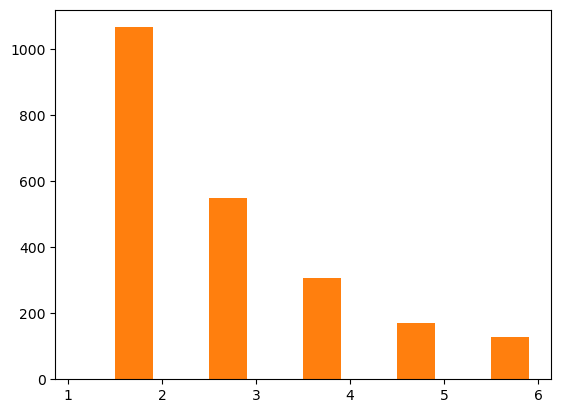

In [18]:
# Gender demographic of billionaires

# Gender proportion pie chart

# Gender with rank and wealth
solodf = full_df.loc[:,['rank','finalWorth']]
bins = [1,2,3,4,5,6]
plt.hist(solodf, bins = bins)

In [19]:
# Age distribution of billionaires by gender

# histogram

# boxplot to see the distribution within gender



In [20]:
# Billionaires by industries

# Histogram

In [21]:
# Billionaires by countries

# histogram

In [22]:
# Geographical distribution

# Top 10 countries with most billionaires

# Use API geoapify to map the countries of billionaires


In [23]:
# Selfmade billionaire vs. Inherited billionaire


# Correlation Analysis of Billionaires

In [24]:
full_df['finalWorth']

0       211.0
1       180.0
2       114.0
3       107.0
4       106.0
        ...  
2635      1.0
2636      1.0
2637      1.0
2638      1.0
2639      1.0
Name: finalWorth, Length: 2640, dtype: float64

In [82]:
country_df = full_df.groupby("country")
country_sum = country_df.count()
country_sum2 = country_df['gdp_country'].unique()
country_sum

,rank,finalWorth,category,personName,age,source,industries,countryOfCitizenship,selfMade,status,...,cpi_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country,total_tax_rate_country,population_country,latitude_country,longitude_country
country,,,,,,,,,,,,,,,,,,,,,
Algeria,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Andorra,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1
Argentina,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Armenia,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Australia,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,84,84,84,84,84,84,84,84,84,84,...,82,84,84,84,84,82,82,84,82,82
United States,755,755,755,755,755,755,755,755,755,755,...,754,755,755,755,755,754,754,755,754,754
Uruguay,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


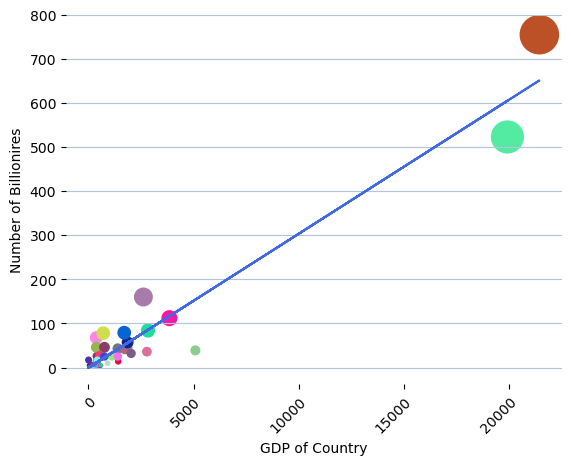

In [101]:
# Billionaire vs. Countries GDP
corr=np.round(st.pearsonr(country_sum2,country_sum['finalWorth'])[0],2)

model = st.linregress(country_sum2.astype(float),country_sum['finalWorth'])

y_values = (country_sum2) * model[0] + model[1]
colors = []
for x in range(len(country_sum2)):
    colors.append(x)
number_of_colors = len(country_sum2)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
plt.scatter(country_sum2, country_sum['finalWorth'], c = color, s = country_sum['population_country'])
plt.plot(country_sum2, y_values, color="royalblue")
plt.grid(c="lightsteelblue", axis = 'y')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.ylim(top = 800)
plt.xlabel('GDP of Country')
plt.ylabel('Number of Billionires')
plt.show()

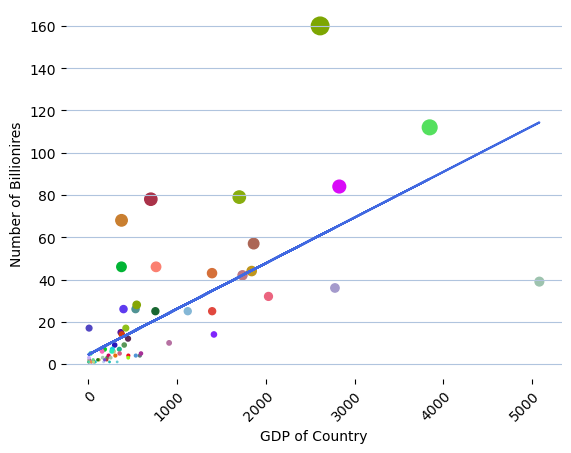

In [102]:
test = country_sum.drop('United States')
test2 = test.drop("China")
test_1 = country_sum2.drop("United States")
test_2 = test_1.drop("China")
corr=np.round(st.pearsonr(test_2,test2['finalWorth'])[0],2)

model = st.linregress(test_2.astype(float),test2['finalWorth'])

y_values = (test_2) * model[0] + model[1]
number_of_colors = len(test_2)
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

plt.scatter(test_2, test2['finalWorth'], c = color,s = test2['population_country'])
plt.plot(test_2, y_values, color="royalblue")
plt.grid(c="lightsteelblue", axis = 'y')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)

plt.xlabel('GDP of Country')
plt.ylabel('Number of Billionires')
plt.show()

In [52]:
len(test2)

0        2778.1
1       21427.7
2       21427.7
3       21427.7
4       21427.7
         ...   
2635    19910.0
2636    21427.7
2637    19910.0
2638    19910.0
2639      376.8
Name: gdp_country, Length: 2640, dtype: float64

In [27]:
# Billionaire vs. Countries Life Expectancies


In [28]:
# Billionaires vs. Countries Population


In [29]:
# Billionaire vs. Countries Tax Revenue


In [30]:
# Billionaire vs. Countries CPI


In [31]:
# Billionaire vs. Education


# Bonus: The chances of you becoming a billionaire

In [32]:
# We are only interested in selfmade billionaire for this part
# Y = billionaire/countries population %
# X = gender + country + age + industries

